`Import Packages`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

`Reading the data`

In [2]:
df = pd.read_csv("dataset/FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [5]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

`Polynomial Regression`

y = c + bx + ax^2

x_2 = x^2 

y = c + bx + ax_2

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)


In [10]:
clf = linear_model.LinearRegression()
clf.fit(train_x_poly,train_y)

print(f"coef=  {clf.coef_} and intercept = {clf.intercept_}")

coef=  [[ 0.         52.89822682 -1.78105925]] and intercept = [102.61188371]


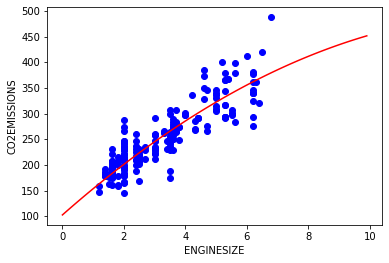

In [13]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS, color='blue')
xx = np.arange(0.0,10.0,0.1)
yy = clf.intercept_[0]+clf.coef_[0][1]*xx+clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy,'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [14]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"R2-score : {r2_score(test_y,test_y_)}")

R2-score : 0.7728879027124904
